# Introduction

Hello Hiring Team,

In an effort to make a strong first impression, I decided to simulate a task that aligns with the responsibilities of a Data Science Intern at Dynatrace. This project serves as a practical demonstration of my ability to analyze data, extract insights, and create dashboards to support business decision-making—all of which are emphasized in the job description.

I will:
- Analyze DataFrame
- Train a model to assign scores based on Churn_probability
- Subdivide into Low, Medium and High
- Build a Dashboard on the Test Dataframe (Note: I have extensive experience using PowerBI but for this purpose I will use dash)

## Dataset Used for this Simulation
For this project I will use the "Customer Churn Dataset" from Kaggle **[Link](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset)**. While this project may not fully replicate all aspects of the work done within Dynatrace’s Data Science team, I believe it is a strong first approach.

This project focuses on data mining, identifying key churn factors, and crafting an interactive dashboard to help sales teams better communicate the value of Dynatrace’s services—all of which align with the role’s focus on data-driven business insights.

Now, let’s dive in and load the dataset!

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output




/Users/claudiogiannini/Desktop/Projects/sideproject_example/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version using kagglehub and add the file path to load the file
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")
file_path_train = os.path.join(path, "customer_churn_dataset-training-master.csv")

# Load the dataframe
df= pd.read_csv(file_path_train)


# Data Exploration
In this section we will: 
- Check for the dtypes of each variable in our dataframe
- Check for missing values

In [3]:
print(df.info())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
None


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


The dtypes for our datframe are divided into float and strings. The variables CustomerID, Age, Tenure, Usage Grequency, Support Calls, Payment Delay, Total Spend, Last Interaction	and Churn however (As one can see in the df.describe()) should be integers. But this can only be done in case of no NAs, so we first check for that and then once we decide on how to approach it we will convert dytypes into integers.

In [4]:
print(df.isnull().sum())


CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


We have one empty row! We will simply drop it

In [5]:
df.dropna(inplace=True)

Great! So now let's change the dtypes into integers

In [6]:
# Columns for which I should change the dtype
float_cols = ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
              'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']

# Convert float columns to integers
df[float_cols] = df[float_cols].astype(int)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   CustomerID         440832 non-null  int64 
 1   Age                440832 non-null  int64 
 2   Gender             440832 non-null  object
 3   Tenure             440832 non-null  int64 
 4   Usage Frequency    440832 non-null  int64 
 5   Support Calls      440832 non-null  int64 
 6   Payment Delay      440832 non-null  int64 
 7   Subscription Type  440832 non-null  object
 8   Contract Length    440832 non-null  object
 9   Total Spend        440832 non-null  int64 
 10  Last Interaction   440832 non-null  int64 
 11  Churn              440832 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 43.7+ MB
None


Now that this is out of the way let's save the correct dtypes from df_test into a variable and use them to configure our df_train

Great! Everything is now in order! let's comment a bit on the columns we have

In [7]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.344771,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.722712,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In our training set, customer ages range from 18 to 65 years. The tenure variable, which represents how long customers have been with the service, spans from 1 to 60 months, with an average tenure of 31.26 months.

Additionally, we track usage frequency, support calls, payment delays, total amount spent, and last interaction date, all of which provide valuable insights into customer behavior.

Finally, the churn rate in our dataset is 56.7%, indicating that more than half of the customers have left the service. 

# Model Training
Our training model won’t be the most optimized or complex, but rather a practical way to categorize customers into different Churn Risk Levels. The main goal of the project is not to achieve the highest predictive accuracy but to create a useful dashboard that visualizes customer risk in an intuitive and business-friendly way.

## Feature Engineering
### Encode Variables
In our feature engineering section we will first encode our object type columns Gender, Subscription Type and Contract Length. We have two variables for gender and three for subscription type and contract length.

In [8]:
print(df["Gender"].unique())
print(df["Subscription Type"].unique())
print(df["Contract Length"].unique())

['Female' 'Male']
['Standard' 'Basic' 'Premium']
['Annual' 'Monthly' 'Quarterly']


In [9]:
# Encode categorical variables
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
    

Here we simplt print the same unqieu values in our variable to recheck the correct implementation and everything seem to have gone as planned!

In [10]:
print(df["Gender"].unique())
print(df["Subscription Type"].unique())
print(df["Contract Length"].unique())

[0 1]
[2 0 1]
[0 1 2]


### Feature Scaling
The last step in our Feature Engineering section will be to use the StandardScaler function in scikit-learn to scale our numerical feature. This is essential in training to ensure that all numerical variables are on the same scale, preventing any one feature from dominating the learning process due to its larger magnitude.

In [11]:
# Separate features and target variable + create a variable customer_ids so that we can drop it in the training
X = df.drop(columns=['Churn'])
customer_ids = X['CustomerID']
X = X.drop(columns=['CustomerID'])

y = df['Churn']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Splitting
Now that we have scaled our variables, we can proceed with splitting the dataset into training and testing sets. For this, we use a classic 80/20 division, where 80% of the data is used for training the model and 20% is reserved for testing its performance on unseen data.

In [12]:
# Train-test split
X_train, X_test, y_train, y_test, customer_ids_train, customer_ids_test = train_test_split(
    X_scaled, y, customer_ids, test_size=0.2, random_state=42
)

## Training
While various machine learning models could have been used for this project—such as Random Forest, XGBoost, or Neural Networks, the primary goal was not to compare different models but to demonstrate how churn risk insights can be effectively visualized in a dashboard.

For this reason, I opted for Logistic Regression that allowed me to focus on structuring and presenting churn risk information in a meaningful way.

That being said, in a more performance-driven scenario, other models SHOULD be explored to improve predictive accuracy!

In [13]:
# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict the churn probability which we will then us to create risk levels
y_probs = log_model.predict_proba(X_test)[:, 1]

# Store everything into df_results
df_results = pd.DataFrame(X_test, columns=X.columns)
df_results['Churn_Probability'] = y_probs

# Define risk levels
df_results['Churn_Risk_Level'] = pd.cut(y_probs, 
                                        bins=[0, 0.2, 0.8, 1], # I set it to: Less than 0.2 Low Risk; Higher than 0.8 High Risk and Medium Risk in between
                                        labels=['Low', 'Medium', 'High'], 
                                        include_lowest=True)

print(df_results.head())



        Age    Gender    Tenure  Usage Frequency  Support Calls  \
0 -1.315921 -1.145909 -1.231844         0.022420       1.431680   
1 -0.512214  0.872670 -1.637507         0.488282      -1.174002   
2 -0.994438 -1.145909  1.491893        -1.491631      -1.174002   
3 -0.351473 -1.145909 -0.188711         0.837679       0.454549   
4 -0.914068  0.872670  1.260085         1.652938      -0.522581   

   Payment Delay  Subscription Type  Contract Length  Total Spend  \
0       0.367433          -0.017006         1.118047    -0.175907   
1       1.093996          -1.245557         1.118047    -1.966351   
2       1.336184           1.211546        -1.114664     1.178350   
3       0.004151          -1.245557        -1.114664    -1.235218   
4      -0.964600          -1.245557        -1.114664    -0.263144   

   Last Interaction  Churn_Probability Churn_Risk_Level  
0         -0.172270           0.990249             High  
1         -0.288601           0.807841             High  
2       

Great! The distribution of churn probabilities shows a smooth yet bimodal pattern, with a concentration of customers at both low (near 0) and high (near 1) churn probabilities. 

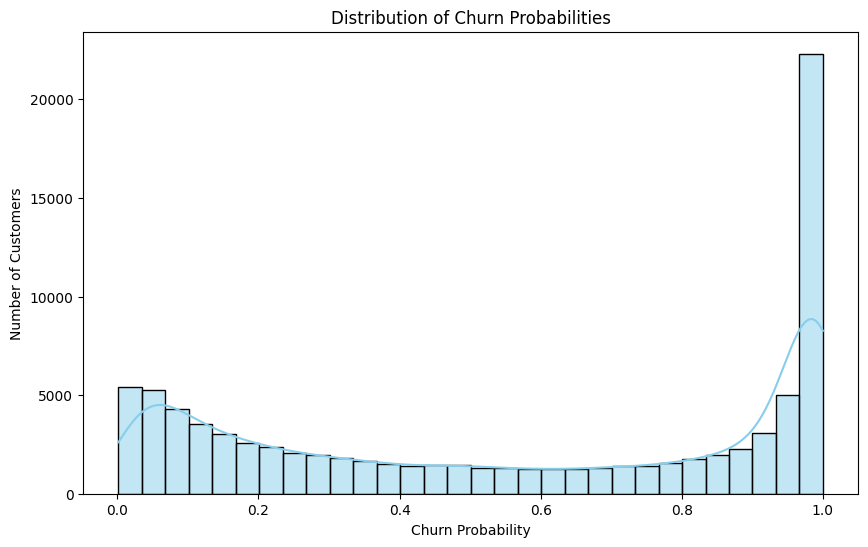

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(y_probs, bins=30, kde=True, color="skyblue")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.title("Distribution of Churn Probabilities")
plt.show()

# Dashboard Creation
To effectively visualize churn risk, we will use Dash to create an interactive dashboard. By joining df_dashboard with the original dataset on CustomerID, we can highlight key characteristics of customers based on their churn probabilities. This will allow us to analyze trends in Age, Support Calls, Usage frequency and total spent. To better analyze the various type of customers based on risk.

## Build the Dashboard Dataframe

In [15]:
df_original = df.copy() 
df_results['CustomerID'] = customer_ids_test.values  

# Copy df_results for visualization
df_dashboard = df_results.copy()
df_original_subset = df_original[['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 
                                  'Subscription Type', 'Last Interaction', 'Total Spend', 
                                  'Payment Delay', 'Support Calls', 'Contract Length']]

# Merge df_dashboard with df_original_subset to restore unscaled values and drop all scaled (_x) columns
df_dashboard = df_dashboard.merge(df_original_subset, on='CustomerID', how='left')
df_dashboard = df_dashboard.drop(columns=[col for col in df_dashboard.columns if col.endswith('_x')])
df_dashboard.rename(columns=lambda col: col[:-2] if col.endswith('_y') else col, inplace=True)

df_dashboard.head()

,Churn_Probability,Churn_Risk_Level,CustomerID,Age,Gender,Tenure,Usage Frequency,Subscription Type,Last Interaction,Total Spend,Payment Delay,Support Calls,Contract Length
0,0.990249,High,164376,23,0,10,16,1,13,589,16,8,2
1,0.807841,High,131603,33,1,3,20,0,12,158,22,0,2
2,0.248477,Medium,22407,27,0,57,3,2,26,915,24,0,0
3,0.991614,High,102279,35,0,28,23,0,29,334,13,5,0
4,0.161360,Low,308111,28,1,53,30,0,15,568,5,2,0


## Build the Dashboard

In [16]:
# Initialize Dash app
app = dash.Dash(__name__)

# Create a bar chart for churn risk levels
fig_risk_levels = px.histogram(df_dashboard, x='Churn_Risk_Level', 
                               title="Churn Risk Levels Distribution", 
                               color="Churn_Risk_Level",
                               labels={'Churn_Risk_Level': 'Risk Level'},
                               category_orders={"Churn_Risk_Level": ["Low", "Medium", "High"]})

# Make the graph look better
fig_risk_levels.update_layout(
    plot_bgcolor='lightgrey',
    paper_bgcolor='#F5F5F5',
    font=dict(color='black')
)


app.layout = html.Div(style={
    'background': '#F5F5F5',
    'min-height': '100vh',
    'padding': '20px'
}, children=[

    # Header with Logo & Title
    html.Div([
        html.Img(src='/assets/logo.png', style={'height': '180px', 'margin-left': '50px'}),
        html.H1("Customer Churn Risk Dashboard", 
                style={'color': 'black', 'margin': 'auto', 'font-family': 'sans-serif', 'font-weight': '200'})
    ], style={'display': 'flex', 'align-items': 'center'}),

    # Dropdown Filter
    html.Div([
        html.Label("Filter by Churn Risk Level:", 
                   style={'font-size': '16px', 'margin-bottom': '5px', 'textAlign': 'center'}),

        dcc.Dropdown(
            id='risk-filter',
            options=[
                {'label': 'Low Risk', 'value': 'Low'},
                {'label': 'Medium Risk', 'value': 'Medium'},
                {'label': 'High Risk', 'value': 'High'}
            ],
            value=None,
            multi=True,
            placeholder="Select risk level...",
            style={'width': '50%', 'margin': 'auto'}
        ),
    ], style={'display': 'flex', 'flex-direction': 'column', 'align-items': 'center', 'justify-content': 'center', 'margin-bottom': '20px'}),


    # Main Content Section
    html.Div([
        # Graph Section
        html.Div([
            dcc.Graph(id='risk-chart', figure=fig_risk_levels)
        ], style={'width': '60%', 'padding': '20px'}),  

        # Summary Stats Section
        html.Div(id='summary-stats', style={
            'width': '40%', 'padding': '20px', 'textAlign': 'center',
            'display': 'flex', 'flex-direction': 'column', 'align-items': 'center',
            'border-left': '2px solid black'  # separator
        }),
    ], style={'display': 'flex', 'justify-content': 'center', 'align-items': 'center', 'gap': '20px'}),
])


@app.callback(
    [Output('risk-chart', 'figure'), Output('summary-stats', 'children')],
    [Input('risk-filter', 'value')]
)
def update_dashboard(selected_risk):
    if not selected_risk:  
        filtered_df = df_dashboard  # Show all data if no filter is selected
    else:
        filtered_df = df_dashboard[df_dashboard['Churn_Risk_Level'].isin(selected_risk)]

    updated_fig = px.histogram(filtered_df, x='Churn_Risk_Level', 
                               title="Churn Risk Levels Distribution", 
                               color="Churn_Risk_Level",
                               labels={'Churn_Risk_Level': 'Risk Level'},
                               category_orders={"Churn_Risk_Level": ["Low", "Medium", "High"]})

    # Apply the same custom styling
    updated_fig.update_layout(
        plot_bgcolor='lightgrey',
        paper_bgcolor='#F5F5F5',
        font=dict(color='black')
    )

    # Updated Summary Statistics
    avg_age = filtered_df['Age'].mean()
    avg_support_calls = filtered_df['Support Calls'].mean()
    avg_total_spend = filtered_df['Total Spend'].mean()
    avg_usage_frequency = filtered_df['Usage Frequency'].mean()

    # Updated Statistic Cards
    stats_cards = html.Div([
        html.Div([
            html.H3(f"{avg_age:.1f}" if not pd.isna(avg_age) else "N/A", 
                    style={'color': 'black', 'font-size': '24px'}),
            html.P("Average Age", style={'color': 'gray', 'font-size': '16px'})
        ], style={'width': '100%', 'padding': '5px', 'textAlign': 'center'}),

        html.Div([
            html.H3(f"{avg_support_calls:.1f}" if not pd.isna(avg_support_calls) else "N/A", 
                    style={'color': 'black', 'font-size': '24px'}),
            html.P("Average Support Calls", style={'color': 'gray', 'font-size': '16px'})
        ], style={'width': '100%', 'padding': '5px', 'textAlign': 'center'}),

        html.Div([
            html.H3(f"${avg_total_spend:.2f}" if not pd.isna(avg_total_spend) else "N/A", 
                    style={'color': 'black', 'font-size': '24px'}),
            html.P("Average Total Spend", style={'color': 'gray', 'font-size': '16px'})
        ], style={'width': '100%', 'padding': '5px', 'textAlign': 'center'}),

        html.Div([
            html.H3(f"{avg_usage_frequency:.1f}" if not pd.isna(avg_usage_frequency) else "N/A", 
                    style={'color': 'black', 'font-size': '24px'}),
            html.P("Average Usage Frequency", style={'color': 'gray', 'font-size': '16px'})
        ], style={'width': '100%', 'padding': '5px', 'textAlign': 'center'}),
    ], style={'display': 'flex', 'flex-direction': 'column', 'align-items': 'center'})

    return updated_fig, stats_cards 

if __name__ == '__main__':
    app.run_server(debug=True)

# Conclusion
As we interact with the dashboard and filter by different churn risk levels, we observe key trends that align with expected customer behavior:
- The average age increases as we move towards higher-risk customers, suggesting that younger users may be more engaged while older users might face usability challenges
- Support calls increase with churn risk, indicating potential dissatisfaction or technical difficulties
- High-risk customers also spend less on the service 
- High-risk customers use it less frequently, reinforcing the idea that engagement is a strong predictor of retention

# Final Notes
Even though the Dynatrce products are completely different from what I made the project, I tried to focus the project on what I believed to be information that could be used by the Sales team as stated in the job posting (Hopefully I didn't misinterpret that! ahah). 

By analyzing churn risk levels and customer behaviour, my goal was to create a dashboard that supports data-driven decision-making similar to how Dynatrace provides actionable insights for businesses through observability.

Thank you for your time and consideration,
Claudio

